# 01_data_discovery.ipynb
# Notebook 1: ADHI Data Discovery

Setup & Imports

In [ ]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive and geospatial visualization
import plotly.express as px
import geopandas as gpd

# Set seaborn style
sns.set(style="whitegrid")

print("Libraries loaded.")

Libraries loaded.


 Load the Data

In [ ]:
# Load ADHI stations metadata
stations_path = "ADHI_stations.csv"
stations_df = pd.read_csv(stations_path)

# Load hydrological summary data
summary_path = "ADHI_summary.csv"
summary_df = pd.read_csv(summary_path)

print(f"Stations data: {stations_df.shape}")
print(f"Hydro summary data: {summary_df.shape}")

Stations data: (1466, 27)
Hydro summary data: (1466, 44)


First Look & Metadata Inspection

In [ ]:
# Quick glance at the stations data
print("Sample rows from stations_df:")
display(stations_df.head())

print("\n Stations DataFrame info:")
stations_df.info()

# Quick glance at the summary data
print("\n Sample rows from summary_df:")
display(summary_df.head())

print("\n Summary DataFrame info:")
summary_df.info()


Sample rows from stations_df:


,ID,Station_co,Name,Data_sourc,Catchment,Mean_altit,Maximum_al,Minimum_al,Mean_annual_precip,Mean_annual_pet,...,lc_sparse,lc_bare,Starting_y,Ending_yea,Number_dams,Country,Longitude,Latitude,Flag,Comment
0,ADHI_1,CMQ0001,VINA NORD (BINI) a PONT DE BEREM,SIEREM,1566.639483,1111.0,1241,926,1492.93,1201.01,...,0.0,0.0,1963,1980,0,Cameroon,13.9500,7.5500,0,
1,ADHI_2,CMQ5002,KADEY a PANA,SIEREM,20015.853570,723.1,1015,602,1548.05,1059.42,...,0.0,0.0,1974,1992,0,Cameroon,14.6833,4.2000,1,gap filling
2,ADHI_3,CMQ5004,DJA a BIE,SIEREM,19054.606070,674.5,779,569,1625.85,939.79,...,0.0,0.0,1972,1992,0,Cameroon,13.3500,2.8000,1,gap filling
3,ADHI_4,CMQ0008,DOUME a DOUME,SIEREM,668.976076,690.8,713,654,1563.54,1033.94,...,0.0,0.0,1950,1980,0,Cameroon,13.4500,4.2333,0,
4,ADHI_5,CMQ5009,FARO a DJELEPO,SIEREM,24217.487570,701.8,1617,244,1464.63,1283.24,...,0.0,0.0,1954,1995,0,Cameroon,12.8167,8.6500,0,



 Stations DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1466 non-null   object 
 1   Station_co          1466 non-null   object 
 2   Name                1466 non-null   object 
 3   Data_sourc          1466 non-null   object 
 4   Catchment           1466 non-null   float64
 5   Mean_altit          1466 non-null   float64
 6   Maximum_al          1466 non-null   int64  
 7   Minimum_al          1466 non-null   int64  
 8   Mean_annual_precip  1466 non-null   float64
 9   Mean_annual_pet     1465 non-null   float64
 10  Mean_annual_temp    1466 non-null   float64
 11  lc_forest           1466 non-null   float64
 12  lc_urban            1466 non-null   float64
 13  lc_crop             1466 non-null   float64
 14  lc_crop_irrig       1466 non-null   float64
 15  lc_grass            1466 non

,ADHI_ID,Mean_q,Std_q,Mini_q,Maxi_q,Jan_q,Feb_q,Mar_q,Apr_q,May_q,...,AC7,FDC_slop,PeakDistri,FlashI,MRC_num,Q_skew,Q_var,RLD,VariI,Freq_0
0,ADHI_1,26.51,23.11,1.97,218.0,10.84,7.67,5.46,7.72,14.65,...,0.84,-2.85,-1.79,0.08,2.0,1.63,534.25,0.42,0.35,0.0
1,ADHI_2,213.48,163.25,16.50,904.0,141.65,93.76,84.99,101.61,134.79,...,0.94,-1.85,-2.53,0.03,1.0,1.55,26649.83,0.19,0.27,0.0
2,ADHI_3,212.57,159.95,5.98,736.0,97.66,64.67,76.76,141.78,202.81,...,0.93,-2.56,-2.21,0.03,3.0,0.97,25583.17,0.13,0.32,0.0
3,ADHI_4,6.04,3.24,0.27,25.6,4.14,3.60,3.89,4.44,5.75,...,0.78,-1.54,-1.49,0.07,2.0,0.76,10.51,0.30,0.22,0.0
4,ADHI_5,305.41,411.20,0.00,3350.0,27.33,11.37,5.80,12.53,49.74,...,0.82,-7.24,-2.42,0.18,2.0,1.85,169086.46,0.40,0.87,0.0



 Summary DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ADHI_ID         1466 non-null   object 
 1   Mean_q          1466 non-null   float64
 2   Std_q           1466 non-null   float64
 3   Mini_q          1466 non-null   float64
 4   Maxi_q          1466 non-null   float64
 5   Jan_q           1461 non-null   float64
 6   Feb_q           1458 non-null   float64
 7   Mar_q           1457 non-null   float64
 8   Apr_q           1460 non-null   float64
 9   May_q           1465 non-null   float64
 10  Jun_q           1465 non-null   float64
 11  Jul_q           1465 non-null   float64
 12  Aug_q           1466 non-null   float64
 13  Sep_q           1466 non-null   float64
 14  Oct_q           1466 non-null   float64
 15  Nov_q           1465 non-null   float64
 16  Dec_q           1465 non-null   float64
 17  q5th   

 Check for unique station count

In [ ]:
print(f"Unique station names: {stations_df['Name'].nunique()}")
print(f"Unique station codes: {stations_df['Station_co'].nunique()}")

Unique station names: 1465
Unique station codes: 1466


In [ ]:
# Check how many unique stations we have

unique_station_names = stations_df["Name"].nunique()
unique_station_codes = stations_df["Station_co"].nunique()  # After renaming earlier

print(f"Unique Station Names: {unique_station_names}")
print(f"Unique Station Codes: {unique_station_codes}")

# Optional: check if any station name is repeated with different codes
duplicates = stations_df.groupby("Name")["Station_co"].nunique()
duplicates = duplicates[duplicates > 1]

if not duplicates.empty:
    print("\n Some station names are shared by multiple codes:")
    display(duplicates)
else:
    print(" Each station name has a unique code.")

Unique Station Names: 1465
Unique Station Codes: 1466

 Some station names are shared by multiple codes:


,Station_co
Name,
BREE at CERES TOEKEN GEB.,2


 Missing Value Analysis

In [ ]:
# Count missing values in each DataFrame
print("Missing values in stations_df:")
missing_stations = stations_df.isnull().sum().sort_values(ascending=False)
display(missing_stations[missing_stations > 0])

print("\n Missing values in summary_df:")
missing_summary = summary_df.isnull().sum().sort_values(ascending=False)
display(missing_summary[missing_summary > 0])

Missing values in stations_df:


,0
Mean_annual_pet,1
Comment,1



 Missing values in summary_df:


,0
FDC_slop,292
BaseflowR,194
BaseflowM_UKIH,192
BaseflowM_LH,192
VariI,192
MRC_num,63
Mar_q,9
Feb_q,8
Apr_q,6
Jan_q,5


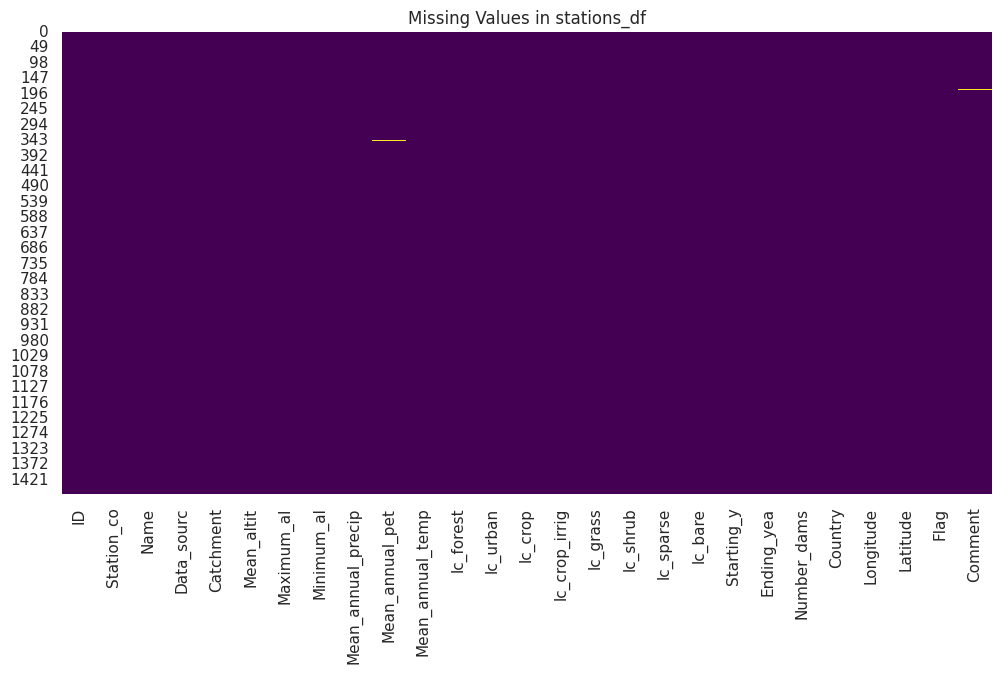

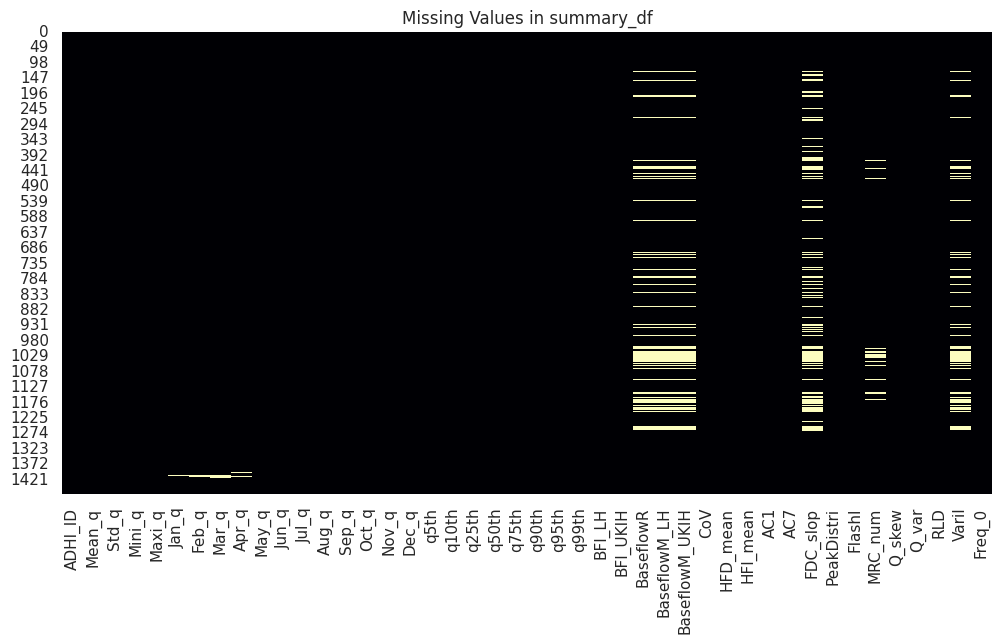

In [ ]:
# Visual heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(stations_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in stations_df")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(summary_df.isnull(), cbar=False, cmap="magma")
plt.title("Missing Values in summary_df")
plt.show()

In [ ]:
# ========== STATIONS DF CLEANING ==========
stations_df["Mean_annual_pet"] = stations_df["Mean_annual_pet"].fillna(stations_df["Mean_annual_pet"].median())
stations_df["Comment"] = stations_df["Comment"].fillna("No comment")

# ========== SUMMARY DF CLEANING ==========

# Drop FDC_slop (too incomplete)
summary_df = summary_df.drop(columns=["FDC_slop"])

# Impute baseflow and variability metrics with median
summary_df[["BaseflowR", "BaseflowM_LH", "BaseflowM_UKIH", "VariI", "MRC_num"]] = \
    summary_df[["BaseflowR", "BaseflowM_LH", "BaseflowM_UKIH", "VariI", "MRC_num"]].fillna(
        summary_df[["BaseflowR", "BaseflowM_LH", "BaseflowM_UKIH", "VariI", "MRC_num"]].median()
    )

# Impute monthly flows with mean
monthly_cols = [
    "Jan_q", "Feb_q", "Mar_q", "Apr_q", "May_q", "Jun_q",
    "Jul_q", "Aug_q", "Sep_q", "Oct_q", "Nov_q", "Dec_q"
]
summary_df[monthly_cols] = summary_df[monthly_cols].fillna(summary_df[monthly_cols].mean())


In [ ]:
print("Remaining missing values (should be 0):")
print("stations_df:", stations_df.isnull().sum().sum())
print("summary_df:", summary_df.isnull().sum().sum())

Remaining missing values (should be 0):
stations_df: 0
summary_df: 0


Visualize missingness (heatmap)

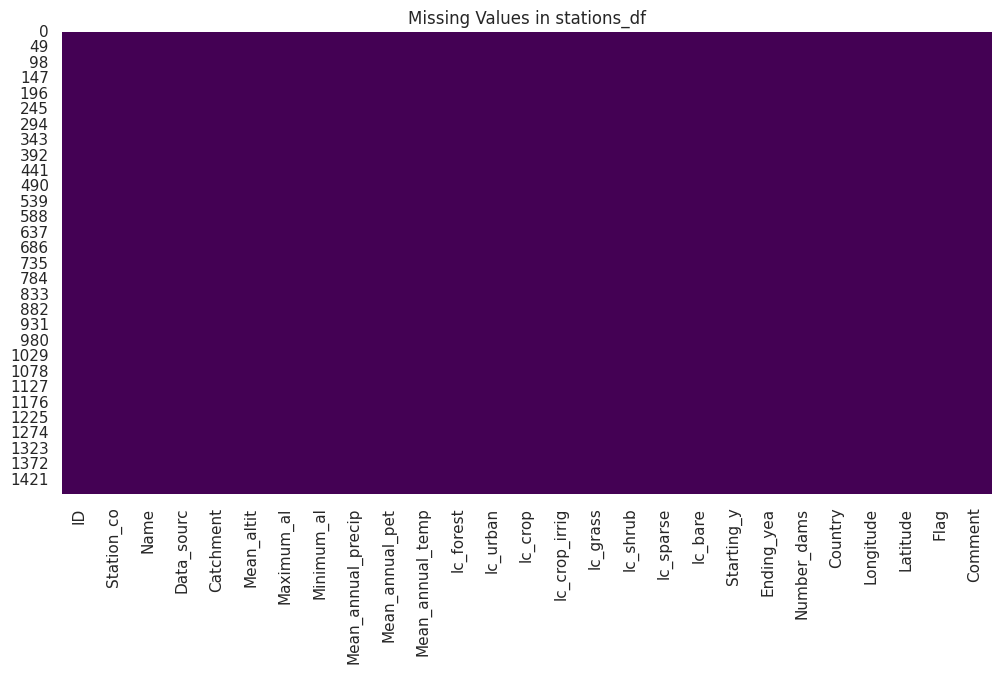

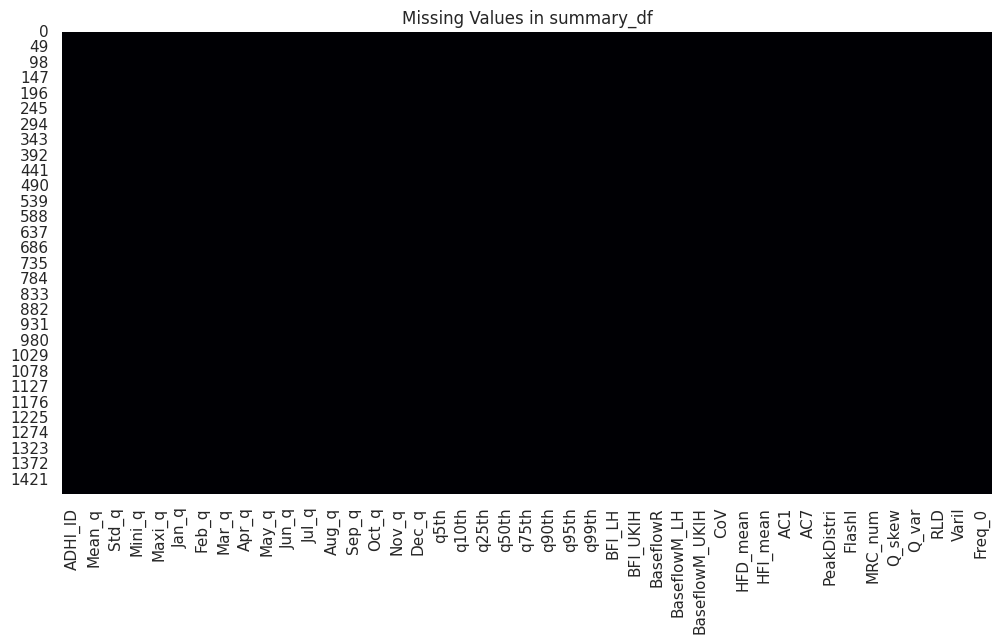

In [ ]:
# Visual heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(stations_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in stations_df")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(summary_df.isnull(), cbar=False, cmap="magma")
plt.title("Missing Values in summary_df")
plt.show()

 Exploratory Data Analysis (EDA)

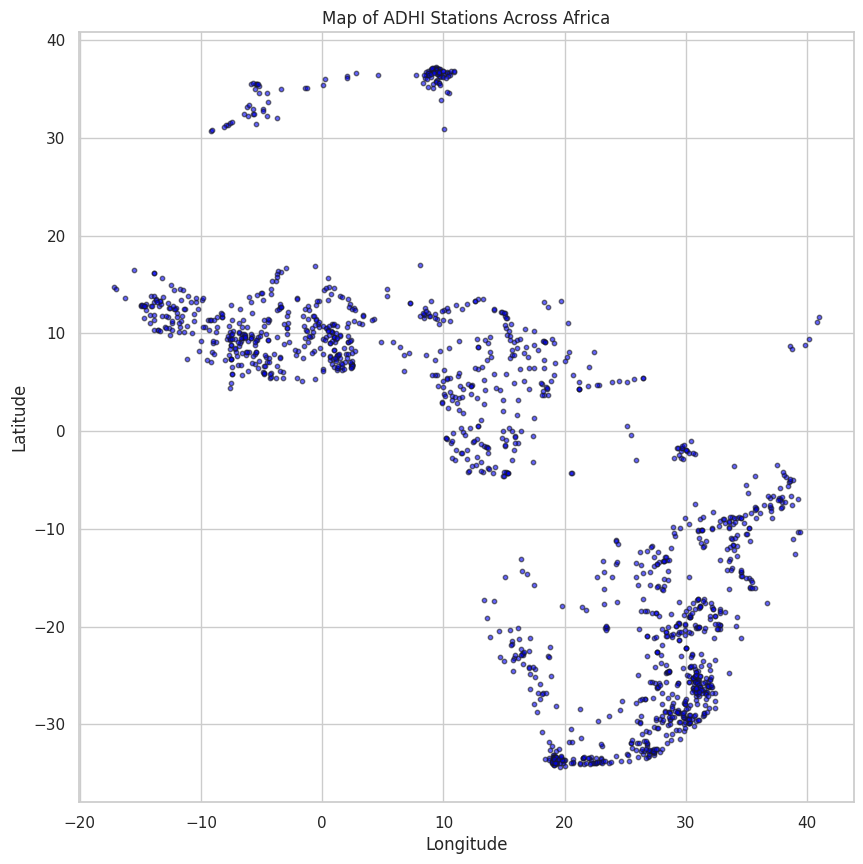

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(
    stations_df["Longitude"], stations_df["Latitude"],
    alpha=0.6, s=10, c="blue", edgecolor="k"
)
plt.title("Map of ADHI Stations Across Africa")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


Distribution of Flood-Related Variables

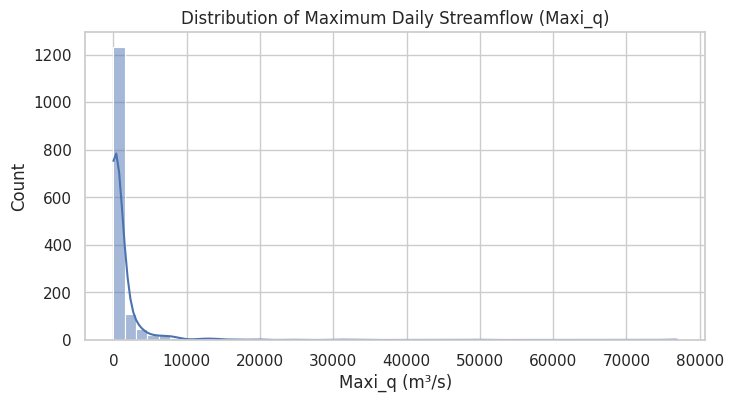

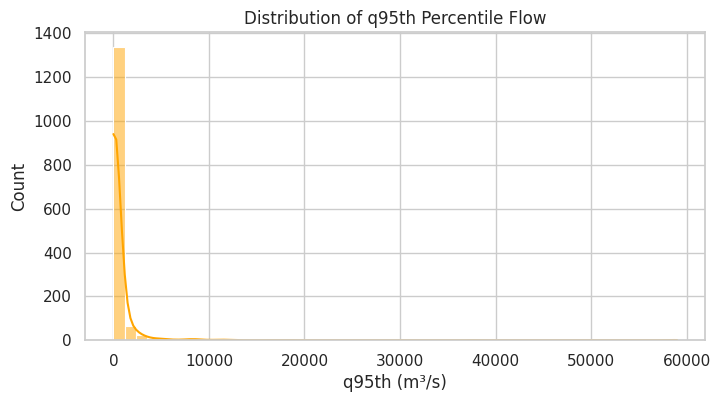

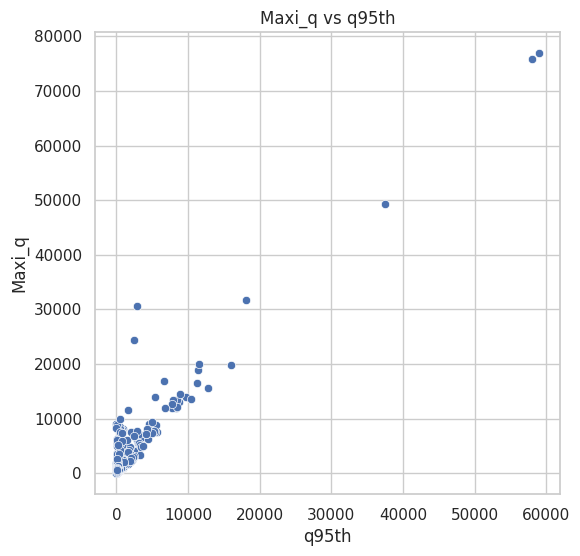

In [ ]:
# Histogram of maximum daily flow
plt.figure(figsize=(8, 4))
sns.histplot(summary_df["Maxi_q"], bins=50, kde=True)
plt.title("Distribution of Maximum Daily Streamflow (Maxi_q)")
plt.xlabel("Maxi_q (m³/s)")
plt.show()

# Histogram of q95th percentile
plt.figure(figsize=(8, 4))
sns.histplot(summary_df["q95th"], bins=50, kde=True, color='orange')
plt.title("Distribution of q95th Percentile Flow")
plt.xlabel("q95th (m³/s)")
plt.show()

# Scatter comparison
plt.figure(figsize=(6, 6))
sns.scatterplot(x="q95th", y="Maxi_q", data=summary_df)
plt.title("Maxi_q vs q95th")
plt.xlabel("q95th")
plt.ylabel("Maxi_q")
plt.grid(True)
plt.show()


Maxi_q and q95th are both right-skewed
- Most stations have low to moderate flow values, but a few have extremely high values (long tails).
→ we may think of log-transform these variables for modeling to normalize them.

There’s a clear positive correlation between Maxi_q and q95th
- This supports using q95th as a station-specific threshold to define flood years (e.g., Flood_Year = Maxi_q > q95th).

 Flood Flag Summary (From stations_df)

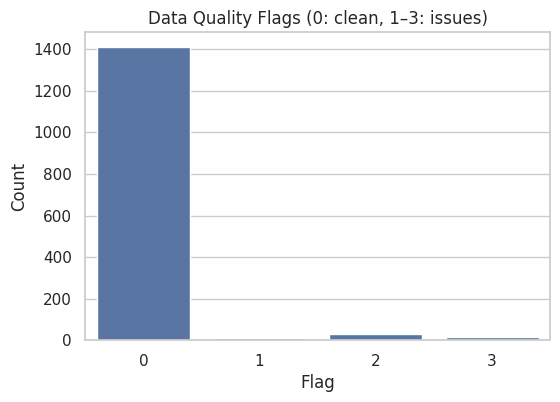

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Flag", data=stations_df)
plt.title("Data Quality Flags (0: clean, 1–3: issues)")
plt.xlabel("Flag")
plt.ylabel("Count")
plt.show()


Correlation Heatmap (Hydrological Features)

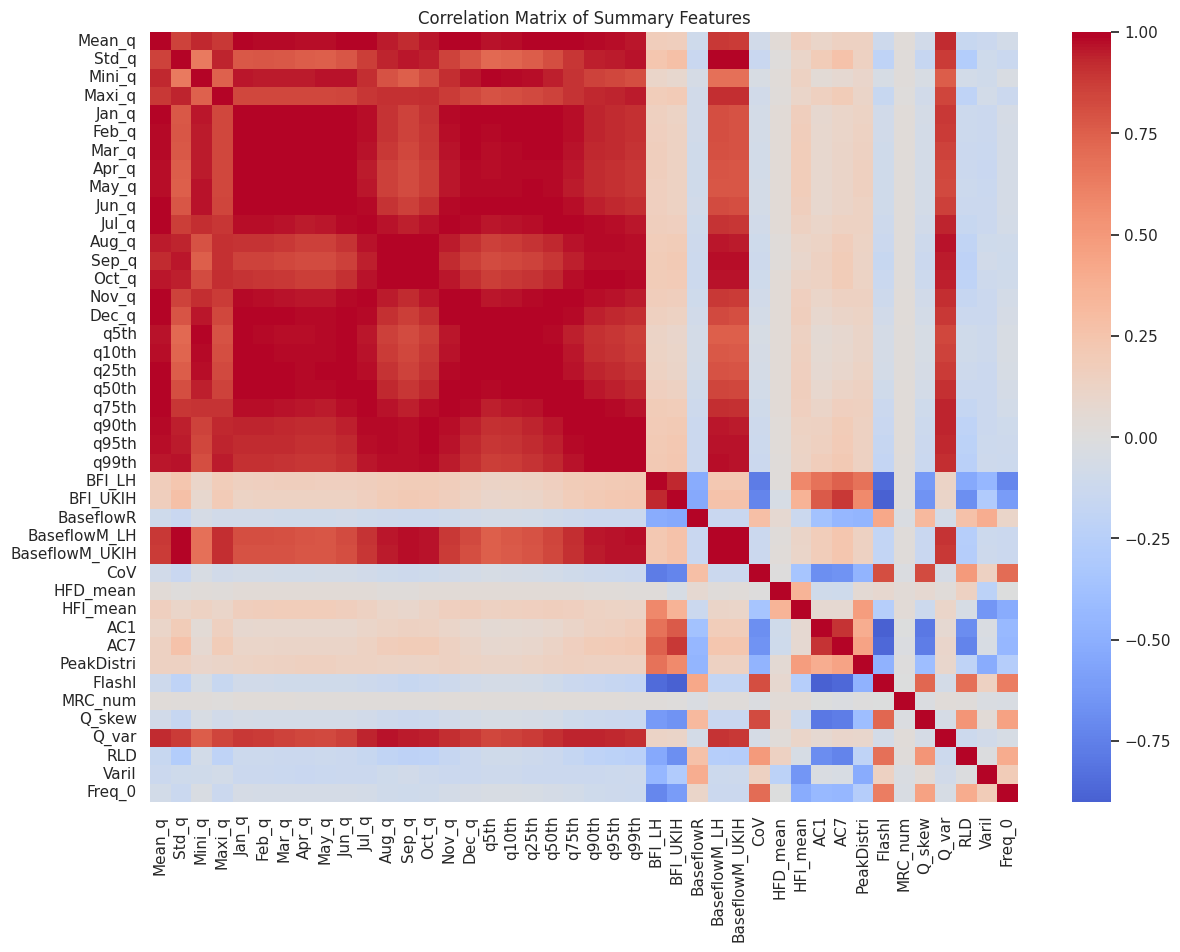

In [ ]:
# Numeric-only correlation
numeric_cols = summary_df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Summary Features")
plt.show()


Variables of Interest

In [ ]:
# Select relevant columns
corr_features = [
    "Maxi_q",             # Max discharge
    "Catchment",          # Catchment area
    "Mean_annual_precip", # Precipitation
    "lc_urban"            # Urban land cover %
]

# Merge from both DataFrames if needed
merged_corr_df = pd.merge(
    stations_df[["ID", "Catchment", "Mean_annual_precip", "lc_urban"]],
    summary_df[["ADHI_ID", "Maxi_q"]],
    left_on="ID", right_on="ADHI_ID", how="inner"
)


In [ ]:
merged_corr_df

,ID,Catchment,Mean_annual_precip,lc_urban,ADHI_ID,Maxi_q
0,ADHI_1,1566.639483,1492.93,0.01,ADHI_1,218.00
1,ADHI_2,20015.853570,1548.05,0.00,ADHI_2,904.00
2,ADHI_3,19054.606070,1625.85,0.00,ADHI_3,736.00
3,ADHI_4,668.976076,1563.54,0.00,ADHI_4,25.60
4,ADHI_5,24217.487570,1464.63,0.00,ADHI_5,3350.00
...,...,...,...,...,...,...
1461,ADHI_1462,165.327812,1537.89,0.06,ADHI_1462,698.00
1462,ADHI_1463,274.067352,1220.66,0.05,ADHI_1463,500.00
1463,ADHI_1464,654.575811,967.09,0.00,ADHI_1464,523.00
1464,ADHI_1465,229216.600300,1382.73,0.00,ADHI_1465,4995.36


 Compute Correlation Matrix

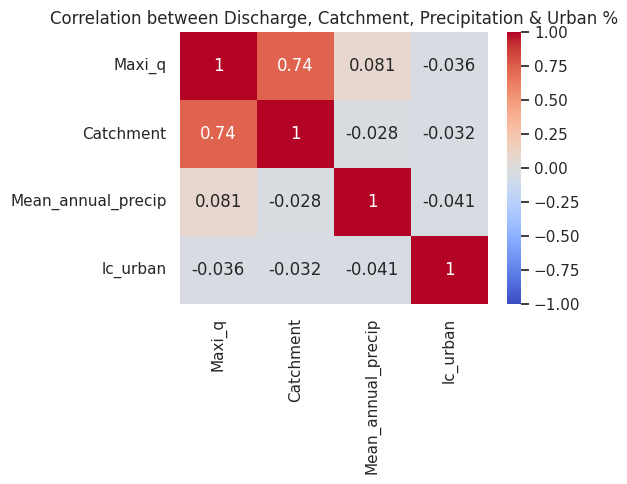

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = merged_corr_df[corr_features].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Discharge, Catchment, Precipitation & Urban %")
plt.tight_layout()
plt.show()


The correlation analysis indicates a strong positive relationship between maximum daily discharge (Maxi_q) and catchment area (Catchment), with a coefficient of 0.74. This confirms the well-established hydrological principle that larger catchments are more likely to generate higher peak flows due to their greater capacity to accumulate and channel runoff.

However, mean annual precipitation shows only a weak correlation with Maxi_q (0.08), suggesting that average rainfall alone does not account for flood extremes—especially in Africa, where rainfall is often highly seasonal, irregular, and concentrated in intense storm events. This supports the need for more temporally resolved precipitation indicators in flood modeling efforts.

Most strikingly, urban land cover (lc_urban) appears to have no significant correlation with peak discharge. While this might initially seem counterintuitive—given the common link between urbanization and increased flood risk—this result reveals a deeper insight into Africa’s urbanization challenge. Many African cities are rapidly expanding but often remain underrepresented or under-measured in large-scale land use datasets like ADHI. In several cases, informal settlements and peri-urban sprawl may not be fully captured by remote sensing classifications, masking the hydrological impact of urban growth.

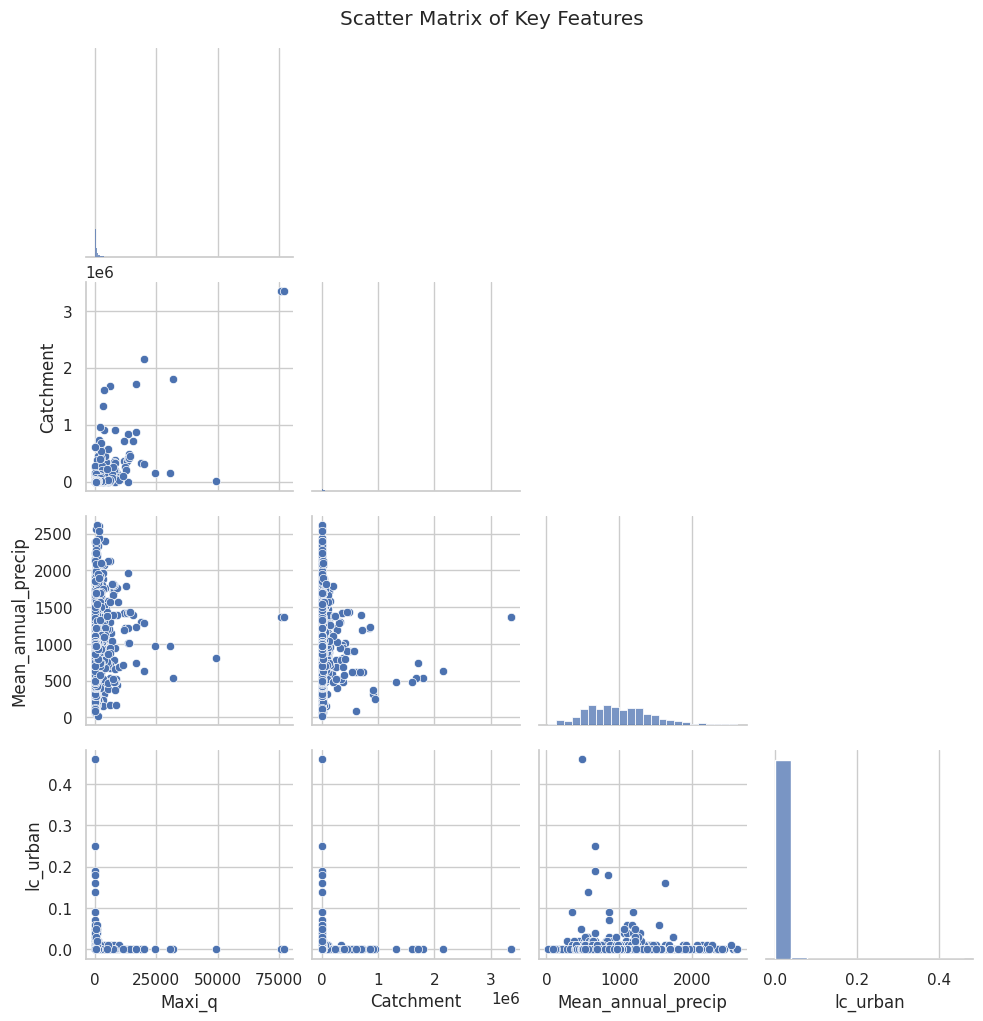

In [ ]:
sns.pairplot(merged_corr_df[corr_features], corner=True)
plt.suptitle("Scatter Matrix of Key Features", y=1.02)
plt.show()

 the lack of correlation could reflect that many gauging stations in the ADHI dataset are located in rural or semi-rural basins, where land cover is dominated by agriculture or forest rather than dense urban infrastructure. This highlights a critical blind spot: as Africa urbanizes at one of the fastest rates globally, flood monitoring infrastructure has not kept pace with the spatial and social complexities of new urban landscapes.

In short, while catchment size remains a dominant driver of peak flows, the limited visibility of urbanization in hydrometric data underscores the urgent need for localized, high-resolution monitoring and modeling frameworks—especially in informal and high-risk urban areas. This is crucial to ensuring that flood resilience planning reflects the realities of Africa’s urban transformation.



Station → Country Mapping

In [ ]:
# Step 1: Extract relevant columns
station_country_df = stations_df[["ID", "Country"]].copy()

# Step 2: Rename for consistency with ADHI summary table
station_country_df = station_country_df.rename(columns={"ID": "ADHI_ID"})

# Step 3: Save to CSV
station_country_df.to_csv("stations_by_country.csv", index=False)

# Preview
print("Saved stations_by_country.csv with the following columns:")
display(station_country_df.head())

Saved stations_by_country.csv with the following columns:


,ADHI_ID,Country
0,ADHI_1,Cameroon
1,ADHI_2,Cameroon
2,ADHI_3,Cameroon
3,ADHI_4,Cameroon
4,ADHI_5,Cameroon


Station Counts per Country

<ipython-input-42-1fa72033662a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_counts.index, y=station_counts.values, palette="viridis")


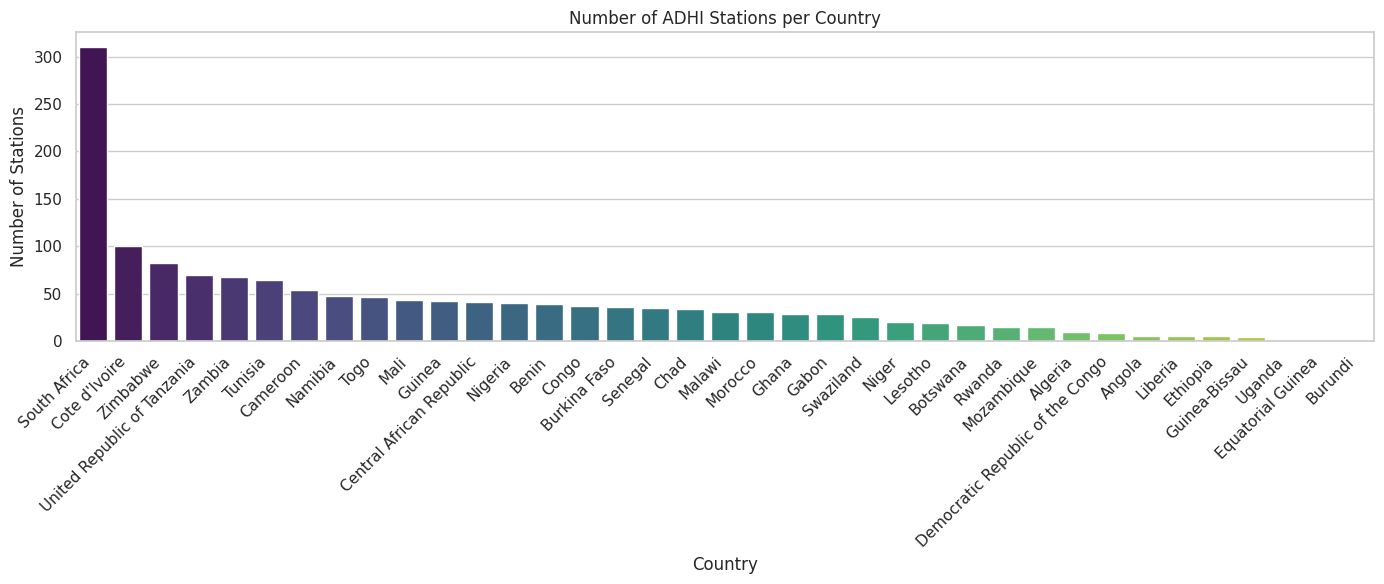

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of stations per country
station_counts = station_country_df["Country"].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=station_counts.index, y=station_counts.values, palette="viridis")

plt.title("Number of ADHI Stations per Country")
plt.xlabel("Country")
plt.ylabel("Number of Stations")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


 What This Tells :
Which countries are data-rich (good for local modeling)

Where federated learning will benefit from strong clients

Where data might be too sparse → good candidates to receive generalized models from JALI

In [ ]:
# Step 1: Merge station metadata with summary features
full_df = pd.merge(
    stations_df,
    summary_df,
    left_on="ID", right_on="ADHI_ID",
    how="inner"
)

# Step 2: Group by country and save each group
for country, group in full_df.groupby("Country"):
    filename = f"data_by_country/{country.replace(' ', '_')}.csv"
    group.to_csv(filename, index=False)
    print(f"Saved {filename} with {len(group)} stations")


Saved data_by_country/Algeria.csv with 10 stations
Saved data_by_country/Angola.csv with 6 stations
Saved data_by_country/Benin.csv with 39 stations
Saved data_by_country/Botswana.csv with 17 stations
Saved data_by_country/Burkina_Faso.csv with 36 stations
Saved data_by_country/Burundi.csv with 1 stations
Saved data_by_country/Cameroon.csv with 54 stations
Saved data_by_country/Central_African_Republic.csv with 41 stations
Saved data_by_country/Chad.csv with 34 stations
Saved data_by_country/Congo.csv with 37 stations
Saved data_by_country/Cote_d'Ivoire.csv with 100 stations
Saved data_by_country/Democratic_Republic_of_the_Congo.csv with 9 stations
Saved data_by_country/Equatorial_Guinea.csv with 1 stations
Saved data_by_country/Ethiopia.csv with 6 stations
Saved data_by_country/Gabon.csv with 29 stations
Saved data_by_country/Ghana.csv with 29 stations
Saved data_by_country/Guinea.csv with 42 stations
Saved data_by_country/Guinea-Bissau.csv with 4 stations
Saved data_by_country/Lesoth

 Feature Grouping & Mapping for Modeling

In [ ]:
# Classification target (for binary flood year prediction)
target_classification = ["Maxi_q", "q95th"]

#  Regression target (predicting flood magnitude)
target_regression = ["Maxi_q"]

# Seasonality target (monthly flow behavior)
target_seasonality = [
    "Jan_q", "Feb_q", "Mar_q", "Apr_q", "May_q", "Jun_q",
    "Jul_q", "Aug_q", "Sep_q", "Oct_q", "Nov_q", "Dec_q"
]

# Catchment physical + climate features (stations_df)
catchment_features = [
    "Catchment", "Mean_altit", "Maximum_al", "Minimum_al",
    "Mean_annual_precip", "Mean_annual_pet", "Mean_annual_temp",
    "lc_forest", "lc_urban", "lc_crop", "lc_crop_irrig",
    "lc_grass", "lc_shrub", "lc_sparse", "lc_bare"
]

# Baseflow & flow indices (summary_df)
baseflow_features = [
    "BFI_LH", "BFI_UKIH", "BaseflowR", "BaseflowM_LH", "BaseflowM_UKIH"
]

# Variability & statistical hydrological features (summary_df)
variability_features = [
    "Mean_q", "Std_q", "Mini_q", "q5th", "q10th", "q25th", "q50th",
    "q75th", "q90th", "q95th", "q99th", "CoV", "Q_skew", "Q_var", "Freq_0",
    "FlashI", "HFD_mean", "HFI_mean", "FDC_slop", "AC1", "AC7",
    "PeakDistri", "MRC_num", "RLD", "VariI"
]

#  Geolocation & station identity (stations_df)
geo_features = ["Longitude", "Latitude", "Country"]

# Metadata / management
meta_columns = [
    "ID", "Station_co", "Name", "Data_sourc", "Starting_y", "Ending_yea",
    "Number_dams", "Flag", "Comment", "ADHI_ID"
]


In [ ]:
all_model_features = (
    catchment_features +
    baseflow_features +
    variability_features +
    geo_features
)

In [ ]:
# Save to CSV
full_df.to_csv('cleaned_ADHI.csv', index=False)